# NONCOVToolbox: Step 4

## Dataset preparation and Machine Learning

### Load necessary modules from the NONCOVToolbox src

In [2]:
# Get the NONCOVToolbox library and print header
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from sklearn.cluster import KMeans
import pathlib as Path

path_noncov = os.path.abspath(os.path.join('..', 'src'))

if path_noncov not in sys.path:
    sys.path.append(path_noncov)

from noncov import NONCOVToolbox, NONCOVHeader

noncov = NONCOVToolbox()

#NONCOVHeader.print_header()

# Pre work on molecular geometries
from noncov import StructureModifier

# OrcaAnalysis module for postprocessing of DFT calculations
from noncov import OrcaAnalysis

# Graph molecular representations
from noncov import MolecularGraph

# Functions to store data in dataframes
from noncov import MachineLearning

# Show performance and features of various NMR functions in module
from noncov import NMRFunctions

# Display the molecule while its displaced, not yet interactive in Jupyter but interactive in VS Code
from noncov import MolView

# Disable printing
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore printing
def enablePrint():
    sys.stdout = sys.__stdout__

In [3]:
# Get work directory and scratch folder for the output data
current_dir = os.getcwd()
print(f'Current work directory is: {current_dir}')

scratch_dir = os.path.abspath(os.path.join('..', 'scratch'))
print(f'Current scratch directory is: {scratch_dir}')
scratch_dir = OrcaAnalysis().convert_path(scratch_dir)

Current work directory is: C:\Users\ettor\Desktop\NONCOV\results
Current scratch directory is: C:\Users\ettor\Desktop\NONCOV\scratch
Normalized path using os.path: C:/Users/ettor/Desktop/NONCOV/scratch


In [4]:
datasets_dir = os.path.join(scratch_dir, 'GenerateMLDataset/data/')
print(f'Dataset directory is: {datasets_dir}')
datasets_dir = OrcaAnalysis().convert_path(datasets_dir)

dataset_name = 'fragments_hopt_nmr.csv'

nucprop = os.path.join(datasets_dir, dataset_name)
nucprop_df = pd.read_csv(nucprop)

Dataset directory is: C:/Users/ettor/Desktop/NONCOV/scratch\GenerateMLDataset/data/
Normalized path using os.path: C:/Users/ettor/Desktop/NONCOV/scratch/GenerateMLDataset/data/


### Test simple data exploration
Source: 
* https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
nucprop_df.head()

,Molecule,Atom,x_coord,y_coord,z_coord,sigma_iso,sigma_xx,sigma_yy,sigma_zz,dia_sigma_xx,...,dia_sigma_zz,para_sigma_xx,para_sigma_yy,para_sigma_zz,sigma_11,sigma_22,sigma_33,s_tot_symmetry,span,skew
0,df_cut_4_n1_opt.xyz,Nucleus 7H :,1.004732,0.618235,0.399603,28.71,34.44,26.20,25.50,45.09,...,20.37,-12.17,3.32,5.17,25.50,26.20,34.44,0,8.94,-0.84
1,df_cut_4_n1_opt.xyz,Nucleus 8H :,-0.479139,0.823720,0.426466,28.66,33.20,27.90,24.88,24.68,...,34.50,-8.86,-2.88,2.09,24.88,27.90,33.20,0,8.32,-0.27
2,df_cut_4_n1_opt.xyz,Nucleus 9H :,-1.139424,1.293590,-0.715278,25.80,29.45,26.15,21.81,45.32,...,30.01,-19.56,0.18,-7.79,21.81,26.15,29.45,0,7.64,0.14
3,df_cut_4_n1_opt.xyz,Nucleus 10H :,-2.529680,1.410024,-0.731269,25.71,21.87,27.98,27.28,45.53,...,18.25,-18.92,-4.64,4.48,21.87,27.28,27.98,0,6.11,0.77
4,df_cut_4_n1_opt.xyz,Nucleus 11H :,-3.272787,1.055261,0.391918,23.23,22.20,23.28,24.21,12.13,...,40.98,10.96,-20.55,-16.79,22.20,23.28,24.21,0,2.01,0.07


In [9]:
# Data summary
nucprop_df.groupby('Molecule').size()

Molecule
df_cut_4_n1_opt.xyz                      22
df_cut_4_n1_opt_disp_struct_0.xyz        22
df_cut_4_n1_opt_disp_struct_1.xyz        22
df_cut_4_n1_opt_disp_struct_10.xyz       22
df_cut_4_n1_opt_disp_struct_11.xyz       22
df_cut_4_n1_opt_disp_struct_12.xyz       22
df_cut_4_n1_opt_disp_struct_13.xyz       22
df_cut_4_n1_opt_disp_struct_14.xyz       22
df_cut_4_n1_opt_disp_struct_15.xyz       22
df_cut_4_n1_opt_disp_struct_16.xyz       22
df_cut_4_n1_opt_disp_struct_17.xyz       22
df_cut_4_n1_opt_disp_struct_18.xyz       22
df_cut_4_n1_opt_disp_struct_19.xyz       22
df_cut_4_n1_opt_disp_struct_2.xyz        22
df_cut_4_n1_opt_disp_struct_3.xyz        22
df_cut_4_n1_opt_disp_struct_4.xyz        22
df_cut_4_n1_opt_disp_struct_5.xyz        22
df_cut_4_n1_opt_disp_struct_6.xyz        22
df_cut_4_n1_opt_disp_struct_7.xyz        22
df_cut_4_n1_opt_disp_struct_8.xyz        22
df_cut_4_n1_opt_disp_struct_9.xyz        22
dw_cut_4_n1_1f_opt.xyz                   26
dw_cut_4_n1_1f_opt_disp

In [10]:
nucprop_df.describe()

,x_coord,y_coord,z_coord,sigma_iso,sigma_xx,sigma_yy,sigma_zz,dia_sigma_xx,dia_sigma_yy,dia_sigma_zz,para_sigma_xx,para_sigma_yy,para_sigma_zz,sigma_11,sigma_22,sigma_33,s_tot_symmetry,span,skew
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.0,852.000000,852.000000
mean,-0.400008,-1.324374,0.593205,44.084777,30.789800,41.076127,60.388134,166.274624,169.376995,167.458732,-128.157160,-135.170599,-107.528181,-16.440927,42.421045,106.273944,0.0,122.714871,-0.109484
std,2.267210,2.709970,1.862887,60.803089,129.453585,73.821386,86.906316,133.235942,141.114072,140.386298,189.851426,159.388473,135.825028,112.258675,58.385464,81.604703,0.0,149.975175,0.343909
min,-4.355684,-8.468174,-3.810125,-205.600000,-647.230000,-307.120000,-381.100000,3.380000,11.070000,8.620000,-1092.880000,-720.880000,-739.710000,-647.230000,-74.420000,24.210000,0.0,2.010000,-0.970000
25%,-2.384134,-3.079608,-1.025780,24.080000,-21.107500,23.585000,23.747500,40.770000,29.195000,29.090000,-136.947500,-233.887500,-208.852500,-65.672500,23.727500,33.440000,0.0,7.610000,-0.260000
50%,-0.647664,-0.175535,0.549454,29.750000,32.500000,28.125000,27.205000,209.700000,230.440000,226.195000,-52.760000,-62.410000,-59.455000,21.000000,28.505000,73.610000,0.0,49.490000,-0.110000
75%,1.299822,0.755114,2.240530,48.890000,120.667500,44.307500,139.725000,252.777500,265.797500,265.125000,-10.090000,-2.070000,-4.350000,25.702500,40.602500,172.782500,0.0,200.145000,0.085000
max,6.349886,1.720907,4.466886,348.330000,401.910000,308.050000,335.030000,489.610000,471.770000,489.600000,17.630000,15.470000,18.020000,308.050000,335.030000,401.910000,0.0,782.550000,0.770000


x_coord              AxesSubplot(0.125,0.749828;0.133621x0.130172)
y_coord           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
z_coord            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sigma_iso         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
sigma_xx          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
sigma_yy             AxesSubplot(0.125,0.593621;0.133621x0.130172)
sigma_zz          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dia_sigma_xx       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
dia_sigma_yy      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dia_sigma_zz      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
para_sigma_xx        AxesSubplot(0.125,0.437414;0.133621x0.130172)
para_sigma_yy     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
para_sigma_zz      AxesSubplot(0.44569,0.437414;0.133621x0.130172)
sigma_11          AxesSubplot(0.606034,0.437414;0.133621x0.130172)
sigma_22          AxesSubplot(0.766379,0.437414;0.133621x0.130

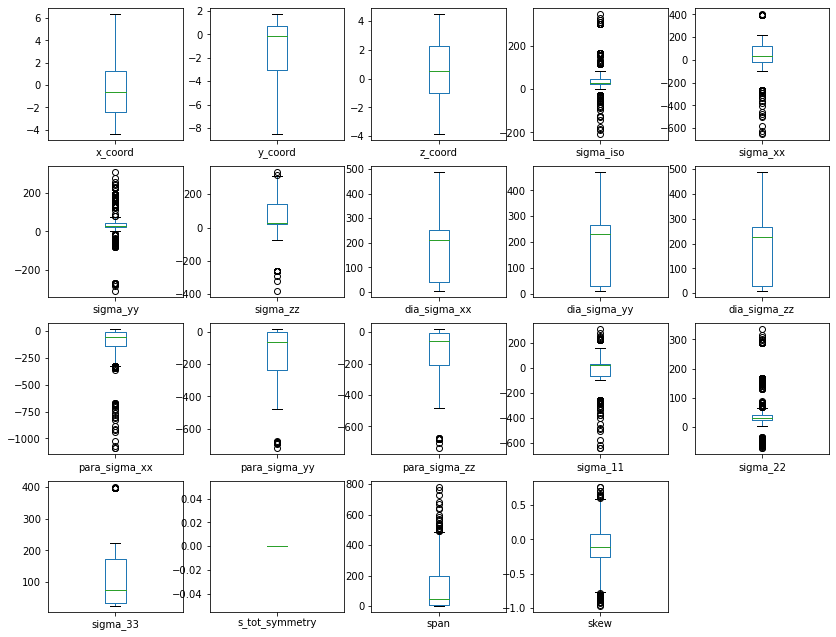

In [14]:
nucprop_df.plot(kind='box', subplots=True,figsize=(14, 14), 
                layout=(5,5), sharex=False, 
                sharey=False)

### Supervised learning
Source: https://dmol.pub/ml/introduction.html

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jax.numpy as jnp
import jax
from jax.example_libraries import optimizers
import sklearn.manifold, sklearn.cluster
import rdkit, rdkit.Chem, rdkit.Chem.Draw
import dmol

ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

### Unsupervised learning

In [26]:
import sklearn.manifold, sklearn.cluster

# get down to 2 dimensions for easy visuals
embedding = sklearn.manifold.Isomap(n_components=2)
# only fit to every 25th point to make it fast
embedding.fit(std_features[::25, :])
reduced_features = embedding.transform(std_features)

NameError: name 'std_features' is not defined